# Bài 1: Numpy và Linear Regression

Trong bài thực hành này, chúng ta sẽ 
- làm quen với numpy, một thư viện hỗ trợ tính toán trên ma trận và tensor hiệu quả;
- giải linear regression bằng exact solution


## 1. Numpy
### Lớp np.array

In [1]:
import numpy as np                 ## thêm thư viện với tên tắt là np

an_array = np.array([3, 33, 333])  #Tạo một mảng 1 chiều

print(type(an_array))              #In lớp của object vừa tạo

<class 'numpy.ndarray'>


In [2]:
print(an_array.shape)              #In kích thước của mảng

(3,)


In [3]:
print(an_array[0], an_array[1], an_array[2])    # Truy suất từng phần tử của mảng bằng index

3 33 333


In [4]:
an_array[0] =888            # ta có thể thay đổi giá trị của một phần tử trong mảng bằng lệnh truy suất và gán

print(an_array)

[888  33 333]


In [5]:
another = np.array([[11,12,13],[21,22,23]])   # tạo một mảng 2 chiều (ma trận)

print(another)  # in ma trận

print("Kích thước của ma trậng 2 dòng, 3 cột: ", another.shape)  # số hàng x số cột            

print("Truy suất các phần tử tại [0,0], [0,1], và [1,0] của ma trận: ", another[0, 0], ", ",another[0, 1],", ", another[1, 0])

[[11 12 13]
 [21 22 23]]
Kích thước của ma trậng 2 dòng, 3 cột:  (2, 3)
Truy suất các phần tử tại [0,0], [0,1], và [1,0] của ma trận:  11 ,  12 ,  21


### Các phép toán

In [6]:
x = np.array([[111,112],[121,122]], dtype=np.int)                  ## tạo một ma trận với từng phẩn từ kiểu int
y = np.array([[211.1,212.1],[221.1,222.1]], dtype=np.float64)      ## tạo một ma trận với từng phẩn từ kiểu float64

print(x)
print()
print(y)

[[111 112]
 [121 122]]

[[211.1 212.1]
 [221.1 222.1]]


In [7]:
# cộng ma trận
print(x + y)        

[[322.1 324.1]
 [342.1 344.1]]


In [8]:
# trừ
print(x - y)

[[-100.1 -100.1]
 [-100.1 -100.1]]


In [9]:
# nhân từng phần tử (element-wise product)
print(x * y)

[[23432.1 23755.2]
 [26753.1 27096.2]]


In [10]:
# chia từng phần tử
print(x / y)

[[0.52581715 0.52805281]
 [0.54726368 0.54930212]]


In [11]:
# nhân ma trận
print(np.matmul(x, y))

[[48195.3 48418.3]
 [52517.3 52760.3]]


In [12]:
# nhân cho một số thực
print(0.01*x)

[[1.11 1.12]
 [1.21 1.22]]


In [13]:
# tính ma trận nghịch đảo
print(np.linalg.inv(x))

[[-12.2  11.2]
 [ 12.1 -11.1]]


In [14]:
# chuyển vị
print(x.T)

[[111 121]
 [112 122]]


### Các hàm khác

In [15]:
# reshape 2x2 thành 4x1
print(x.reshape(4,1))

[[111]
 [112]
 [121]
 [122]]


In [16]:
#tạo một ma trận toàn giá trị 1 có kích thước 3x4
print(np.ones((3,4)))

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [17]:
# nối 2 ma trận bằng cách nối cột với nhau
np.concatenate([x,y], axis=1)

array([[111. , 112. , 211.1, 212.1],
       [121. , 122. , 221.1, 222.1]])

In [18]:
# nối 2 ma trận bằng cách nối hàng với nhau
np.concatenate([x,y], axis=0)

array([[111. , 112. ],
       [121. , 122. ],
       [211.1, 212.1],
       [221.1, 222.1]])

## 2. Linear Regression

In [19]:
import pandas as pd
df = pd.read_csv("House_Price.csv")        ## load file csv vào pd.DataFrame

In [20]:
df.head()                 ## xem thử DataFrame

,Size in feet squared,Price in thousand dollar
0,2497,729
1,1627,617
2,576,290
3,2156,728
4,1154,453


Text(0, 0.5, 'Price in thousand dollar')

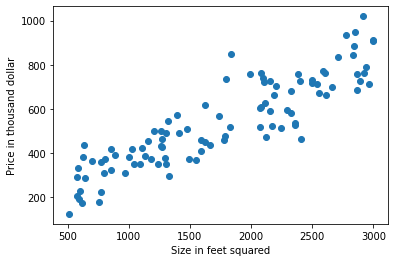

In [21]:
## vẽ hình
import matplotlib.pyplot as plt
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

Bây giờ chúng ta muốn làm một bài toán dựa vào kích thước của ngôi nhà, đoán giá tiền

- $X$ = diện tích ngôi nhà

- $y$ = giá tiền (chưa biết, muốn dự đoán)

Ta giả thiết $\hat{y} = aX + b$  với $a$ và $b$ là số thực

Ta tìm $a$ và $b$ sao cho trung bình bình phương sai số nhỏ nhất khi đoán, tức là tìm $a$ và $b$ sao cho

$$ \frac{1}{n} \sum (y-\hat{y})^2 = \frac{1}{n} \sum (y - aX - b)^2 $$

đạt giá trị nhỏ nhất, với $n$ là số mẫu.

Với $X$, $y$ là các ma trận với mỗi hàng là một sample, $X$ là data và $y$ là target.
Gọi $Z$ là mận trận mở rộng của $X$ nhưng có thêm một cột toàn số 1.
Khi đó nghiệm của bài toán Linear Regression là
$$(Z^TZ)^{-1}Z^Ty.$$

Tức là trong bài toán này, mỗi hàng của $X$ là diện tích của một căn nhà, tương ứng hàng của $y$ là giá của nhà đó. Cụ thể, bài toán được lập trình như sau

In [22]:
X = df['Size in feet squared'].values    ## trích diện tích thành một mảng numpy
X = X.reshape(-1, 1)                     ## chuyển thành ma trận cột

In [23]:
y = df['Price in thousand dollar'].values   ## Trích giá tiền 
y = y.reshape(-1,1)


In [24]:
Z = np.concatenate([X, np.ones((100,1))], axis=-1)   ## thêm một cột vào sau X và gán vào Z
Z = Z.astype(np.float32)                                 ## chuyển sang float


In [25]:
## giá trị a và b tìm được
np.matmul(np.matmul(np.linalg.inv(np.matmul(Z.T,Z)), Z.T), y)

array([[  0.23481099],
       [128.49492905]])

Text(0, 0.5, 'Price in thousand dollar')

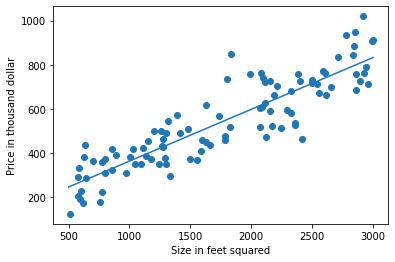

In [26]:
## vẽ hình
import matplotlib.pyplot as plt
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.plot(np.arange(500, 3000), 0.23481099*np.arange(500, 3000) + 128.49492905)   ## vẽ solution tìm được
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

## Bài tập
Cho dữ liệu gồm 100 hàng, gồm chiều rộng, chiều dài và giá của một ngôi nhà, hay xây dựng một mô hình dư đoán giá nhà dựa vào chiều dài và rộng.

Hãy dùng mô hình học được: dự đoán xem căn nhà có thông số sau khả năng cao là giá bao nhiêu:
- width = 5, length = 10
- width = 20, length = 20
- width = 10, length = 40

## Nộp bài
- Code và chạy kết quả lưu vào file notebook NMMH_TH1_MSSV.ipynb (notebook phải có kết quả chạy nếu ko xem như chưa làm)
- Nén thành file NMMH_TH1_MSSV.rar (.zip) và nộp về: dinhvietcuong1996@gmail.com
- Deadline: 23g59 thứ 3 ngày 26/05/2020. Nộp trễ bị chia đôi số điểm.

In [27]:
# Import dependencies libraries
# Import numpy
import numpy as np 
# Import pandas
import pandas as pd
# Import matplotlib.pylot
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns 

In [28]:
## Read input data
house_price = pd.read_csv('House_Price_2.csv')

In [29]:
house_price.head()

,width,length,price
0,28,97,3.350184e+08
1,21,62,2.298295e+08
2,27,64,2.603552e+08
3,5,92,2.064708e+08
4,13,84,2.339808e+08


In [30]:
house_price.shape

(100, 3)

In [31]:
house_price.describe()

,width,length,price
count,100.000000,100.000000,1.000000e+02
mean,16.910000,59.770000,2.046623e+08
std,7.254528,22.784832,6.439491e+07
min,5.000000,20.000000,7.257961e+07
25%,11.000000,39.000000,1.583727e+08
50%,16.000000,60.500000,1.951909e+08
75%,23.000000,79.000000,2.513378e+08
max,29.000000,97.000000,3.377315e+08


## Data cleaning

In [32]:
# Checking Null values
house_price.isnull().sum()*100/house_price.shape[0]
# There are no NULL values in the dataset, hence it is clean.

width     0.0
length    0.0
price     0.0
dtype: float64

In [33]:
for column in house_price.columns:
    print(column, len(house_price[str(column)].unique()))

width 25
length 59
price 100


## Data visualization

array([[<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

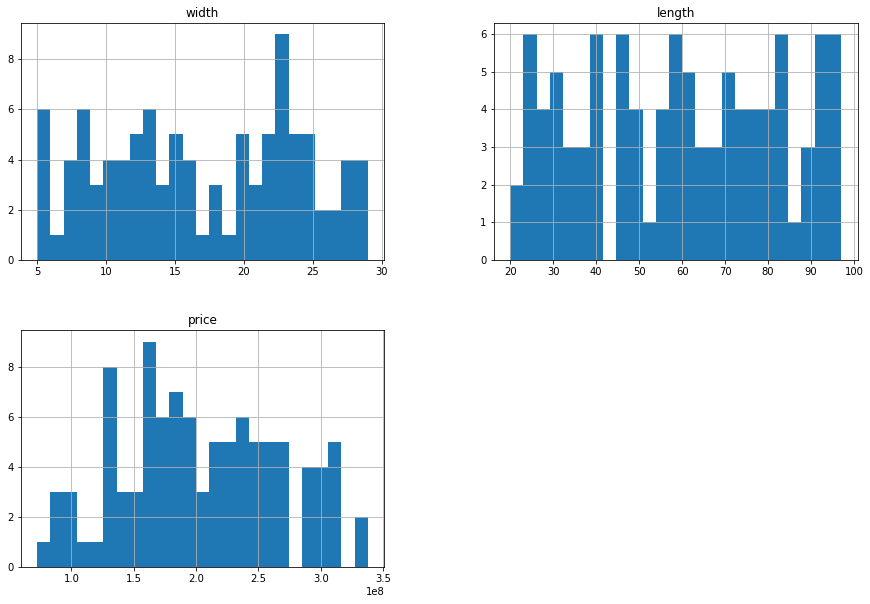

In [34]:
house_price.hist(figsize=(15, 10), bins=25, xlabelsize=10, ylabelsize=10)

<AxesSubplot:xlabel='length', ylabel='price'>

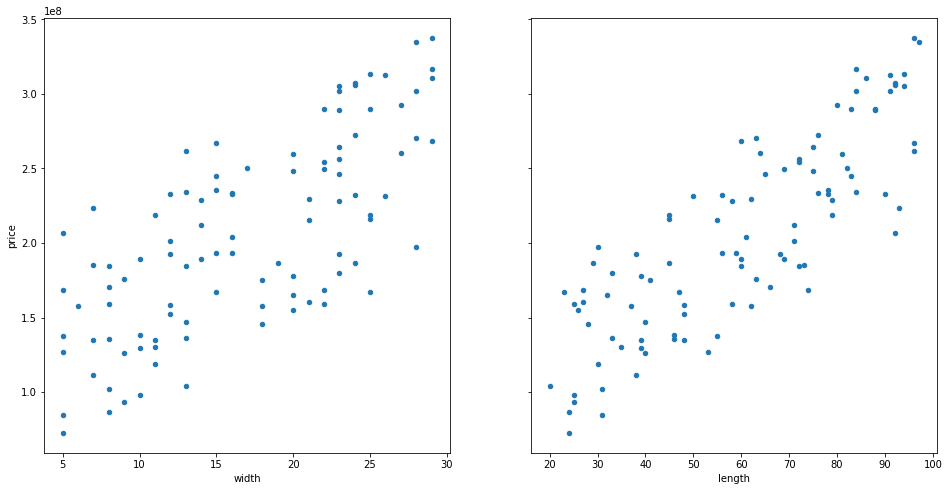

In [35]:
fig, axs = plt.subplots(1, 2, sharey=True)
house_price.plot(kind='scatter', x='width', y='price', ax=axs[0], figsize=(16, 8))
house_price.plot(kind='scatter', x='length', y='price', ax=axs[1])

### Price data

In [36]:
house_price.price.describe()

count    1.000000e+02
mean     2.046623e+08
std      6.439491e+07
min      7.257961e+07
25%      1.583727e+08
50%      1.951909e+08
75%      2.513378e+08
max      3.377315e+08
Name: price, dtype: float64

/home/lenux/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='price'>

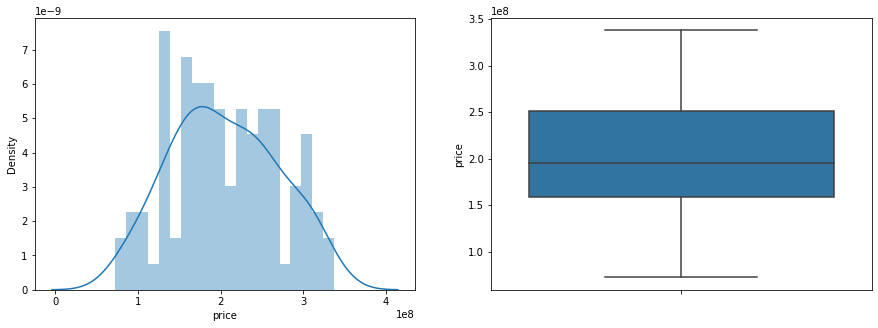

In [37]:
price_fig, price_axs = plt.subplots(ncols = 2, figsize=(15, 5))
sns.distplot(house_price['price'], kde=True, bins=20,  ax=price_axs[0])
sns.boxplot(y=house_price['price'], orient='v' ,ax=price_axs[1])

### Width data

In [38]:
house_price.width.describe()

count    100.000000
mean      16.910000
std        7.254528
min        5.000000
25%       11.000000
50%       16.000000
75%       23.000000
max       29.000000
Name: width, dtype: float64

/home/lenux/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='width'>

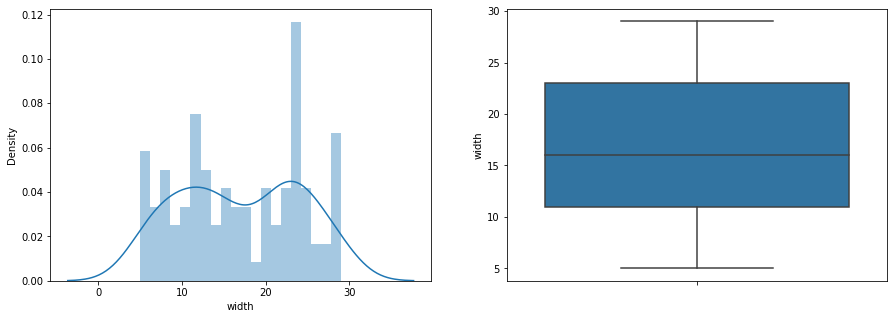

In [39]:
width_fig, width_axs = plt.subplots(ncols = 2, figsize=(15, 5))
sns.distplot(house_price['width'], kde=True, bins=20,  ax=width_axs[0])
sns.boxplot(y=house_price['width'], orient='v' ,ax=width_axs[1])

### Length data

In [40]:
house_price.length.describe()

count    100.000000
mean      59.770000
std       22.784832
min       20.000000
25%       39.000000
50%       60.500000
75%       79.000000
max       97.000000
Name: length, dtype: float64

/home/lenux/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='length'>

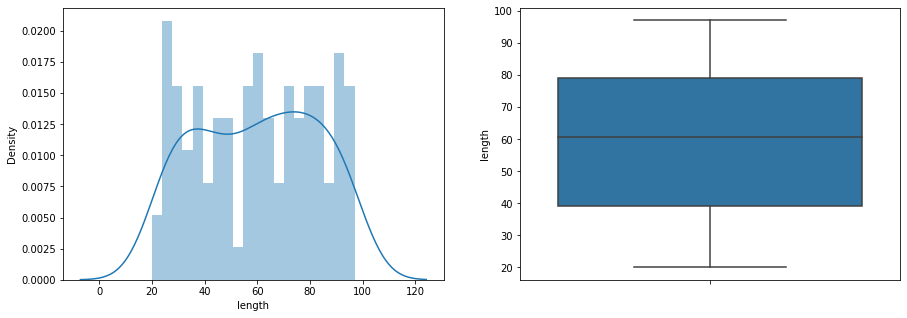

In [41]:
length_fig, length_axs = plt.subplots(ncols = 2, figsize=(15, 5))
sns.distplot(house_price['length'], kde=True, bins=20,  ax=length_axs[0])
sns.boxplot(y=house_price['length'], orient='v' ,ax=length_axs[1])

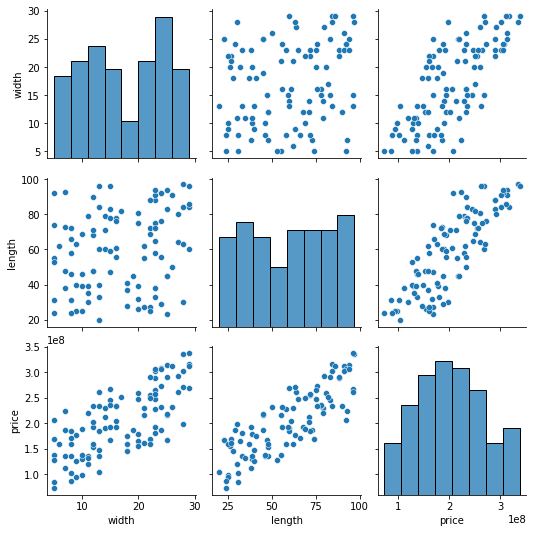

In [42]:
sns.pairplot(house_price)
plt.show()

### Splitting the Data into Training and Testing Sets

In [43]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(house_price, train_size = 0.7, test_size = 0.3, random_state = 100)

In [44]:
df_train.head()

,width,length,price
32,10,25,9.812020e+07
6,14,60,1.893253e+08
3,5,92,2.064708e+08
12,15,96,2.669363e+08
51,27,80,2.922542e+08


In [45]:
df_train.describe()

,width,length,price
count,70.000000,70.000000,7.000000e+01
mean,17.542857,60.257143,2.088839e+08
std,7.306312,22.307915,6.073164e+07
min,5.000000,23.000000,9.350029e+07
25%,11.000000,39.250000,1.620862e+08
50%,18.500000,61.000000,2.039365e+08
75%,23.000000,78.000000,2.560457e+08
max,29.000000,97.000000,3.350184e+08


In [46]:
x_train = df_train.drop(['price'], axis=1)
y_train = df_train.price
x_test = df_test.drop(['price'], axis=1)
y_test = df_test.price

In [47]:
x_train.shape, y_train.shape

((70, 2), (70,))

In [48]:
x_test.shape, y_test.shape

((30, 2), (30,))

In [49]:
X = x_train.values
X.shape               

(70, 2)

In [50]:
y = y_train.values  
y = y.reshape(-1,1)
y.shape

(70, 1)

In [51]:
Z = np.concatenate([X, np.ones((X.shape[0],1))], axis=-1)
Z = Z.astype(np.float32)                               

In [52]:
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(Z.T,Z)), Z.T), y)
w

array([[5003147.8267983 ],
       [1999671.64224388],
       [ 619890.56435069]])

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score, accuracy_score
# Mô hình hồi quy tuyến tính
Lin_reg = LinearRegression(fit_intercept=True)
Lin_reg.fit(x_train, y_train)

LinearRegression()

In [54]:
# Hệ số của các đặc trưng, hệ số chặn trong mô hình regression của dữ liệu, điểm số trên tập test
print('Linear regression intercept = ', Lin_reg.intercept_) # hệ số bậc 0
print('Linear regression coefficient = ', Lin_reg.coef_) # hệ số bậc 1
print('Linear regression score on test data = ', Lin_reg.score(x_test, y_test)) #: phương sai

Linear regression intercept =  619797.6890618503
Linear regression coefficient =  [5003155.14387629 1999670.93137573]
Linear regression score on test data =  0.9984827854302862


In [55]:
# Hệ số của các đặc trưng
for i in range(len(x_train.columns)):
    print(x_train.columns[i], ": ", Lin_reg.coef_[i])

width :  5003155.143876295
length :  1999670.9313757333


In [56]:
# Test trên tập huấn luyện
y_train_pred = Lin_reg.predict(x_train)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)

print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  3009893.304093722
R2:  0.9975081544061387


In [57]:
# Predict
y_pred = Lin_reg.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (np.sqrt(mse))
mv = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

output = pd.DataFrame(y_test[0:10])
output['predicted price'] = y_pred[0:10]
output['difference'] = output['predicted price'] - output['price']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print("Mean Absolute Error is", round(mae,1))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("Variance explained by model", round(mv*100,5), "%")

           price  predicted price    difference
37  3.125836e+08     3.126719e+08  8.827832e+04
62  1.374082e+08     1.356175e+08 -1.790715e+06
26  3.133697e+08     3.136677e+08  2.980489e+05
41  2.596031e+08     2.626562e+08  3.053102e+06
35  1.550823e+08     1.526743e+08 -2.408000e+06
25  2.043805e+08     2.026502e+08 -1.730287e+06
36  7.257961e+07     7.362768e+07  1.048070e+06
33  3.021521e+08     3.086805e+08  6.528429e+06
77  1.931637e+08     1.936477e+08  4.840565e+05
21  1.800681e+08     1.816815e+08  1.613368e+06 

Model testing performance:
--------------------------
Mean Absolute Error is 2041406.6
RMSE is 2771401.820192879
R2 score is 0.9984827854302862
Variance explained by model 99.84972 %


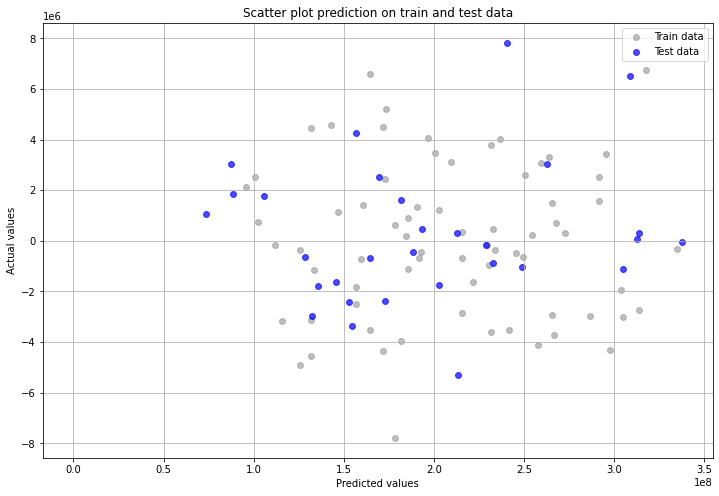

In [58]:
# plotting
plt.figure(figsize=(12,8))

plt.scatter(y_train_pred, y_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_pred, y_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.title('Scatter plot prediction on train and test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax=6000, lw = 2, color = 'red')
plt.grid()
plt.show()